<a href="https://colab.research.google.com/github/anu-Prakash-19/Facial-Recognition-Door/blob/main/Indian_Food_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import tensorflow
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib_inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving indian_food.csv to indian_food (3).csv


In [ ]:
df=pd.read_csv('indian_food.csv')

In [ ]:
# Read input data from the csv file
train=pd.read_csv("indian_food.csv")
# Print the data for 5 rows
train.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
train.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [ ]:
train.shape

(255, 9)

<Axes: ylabel='region'>

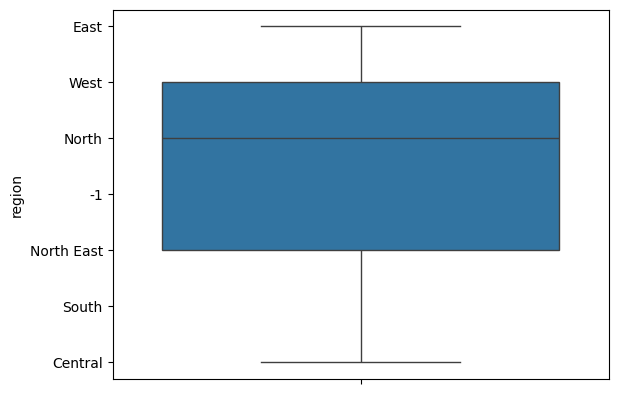

In [ ]:
sns.boxplot(df.region)

In [ ]:
from __future__ import absolute_import, division, print_function

import cv2
import os
import random
import collections
from collections import defaultdict
from shutil import copy, copytree, rmtree
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

# Use this line only if you're in a Jupyter notebook
# %matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.applications.resnet50 import decode_predictions, preprocess_input

# If you're using Google Colab, uncomment the next line
# from google.colab.patches import cv2_imshow


In [ ]:
# Check TF version and whether GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())

2.17.0



In [ ]:
# Download data and extract it to folder
# define or import the get_data_extract function before calling it.
def get_data_extract():
  print('Data extracted!')

get_data_extract()

Data extracted!


In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/mnt/data/indian_food.csv'  # Adjust the path if needed


# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(df.head())

# Display information about the dataset (columns, data types, etc.)
print("\nDataset Information:")
print(df.info())

# Display basic statistical summary of numerical columns
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())


First 5 rows of the dataset:
             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East  

Dataset Inform

<Axes: >

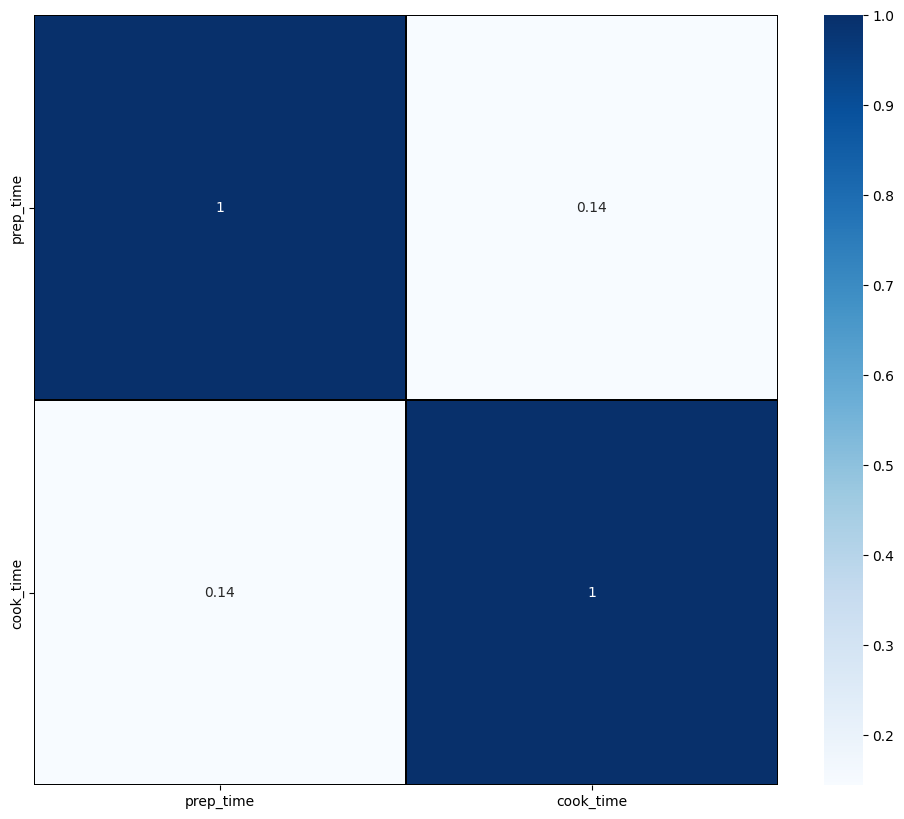

In [ ]:
plt.figure(figsize=(12,10))
# Computing the correlation matrix for the training data
# Include only numerical features for correlation analysis
corr = train.select_dtypes(include=np.number).corr()
# Creating a heatmap to visualize the correlation matrix with annotations
sns.heatmap(corr, annot = True, linewidths= 0.2, linecolor= 'black', cmap = 'Blues')

             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  North  
3   West  
4   East  


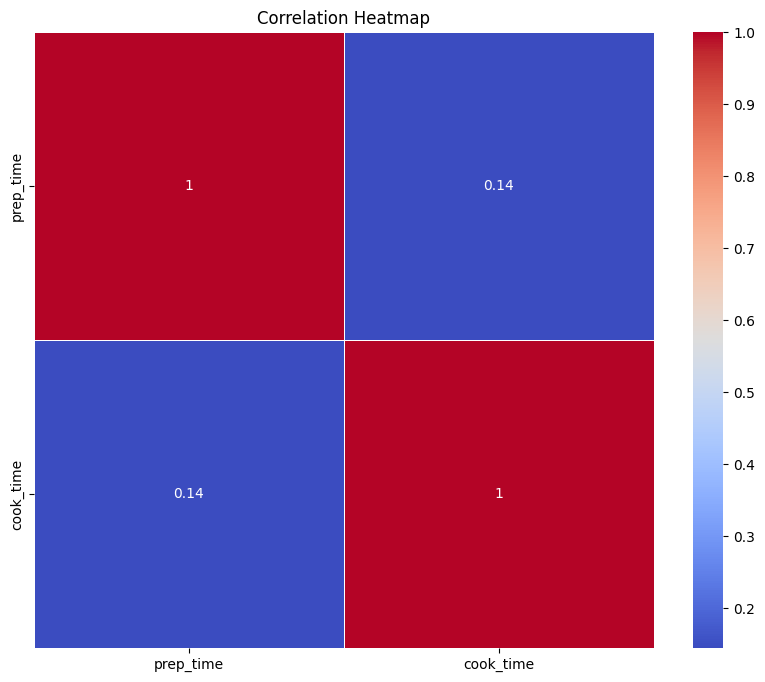

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/mnt/data/indian_food.csv'
df=pd.read_csv('indian_food.csv')

# Display the first few rows to check the data structure
print(df.head())

# Extract only the numerical columns from the dataset
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Check if there are numerical columns available
if numerical_df.empty:
    print("No numerical columns found in the dataset to create a heatmap.")
else:
    # Compute the correlation matrix
    corr_matrix = numerical_df.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()


Shape of the dataset (Rows, Columns): (255, 9)

Column Names and Data Types:
name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object

Missing Values in Each Column:
name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

Statistical Summary of Numerical Columns:
        prep_time   cook_time
count  255.000000  255.000000
mean    31.105882   34.529412
std     72.554409   48.265650
min     -1.000000   -1.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000

Summary of Categorical Columns:

Column: name
name
Balu shahi         1
Chorafali          1
Vada               1
Chicken Varuval    1
Upma      

<ipython-input-61-4c64c8eecdb3>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


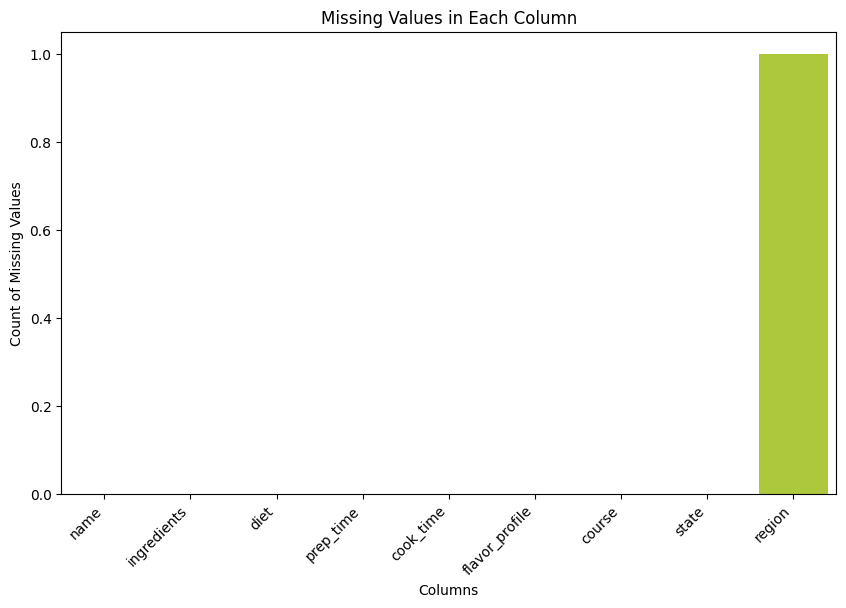

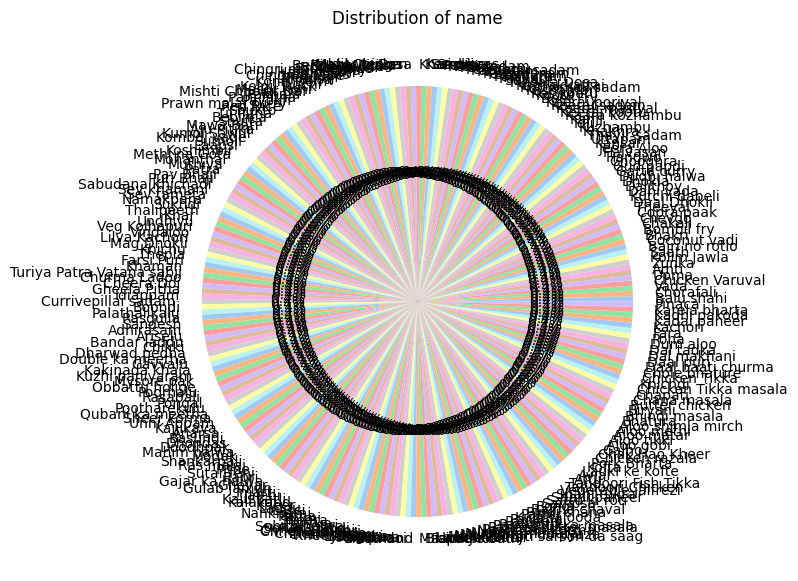

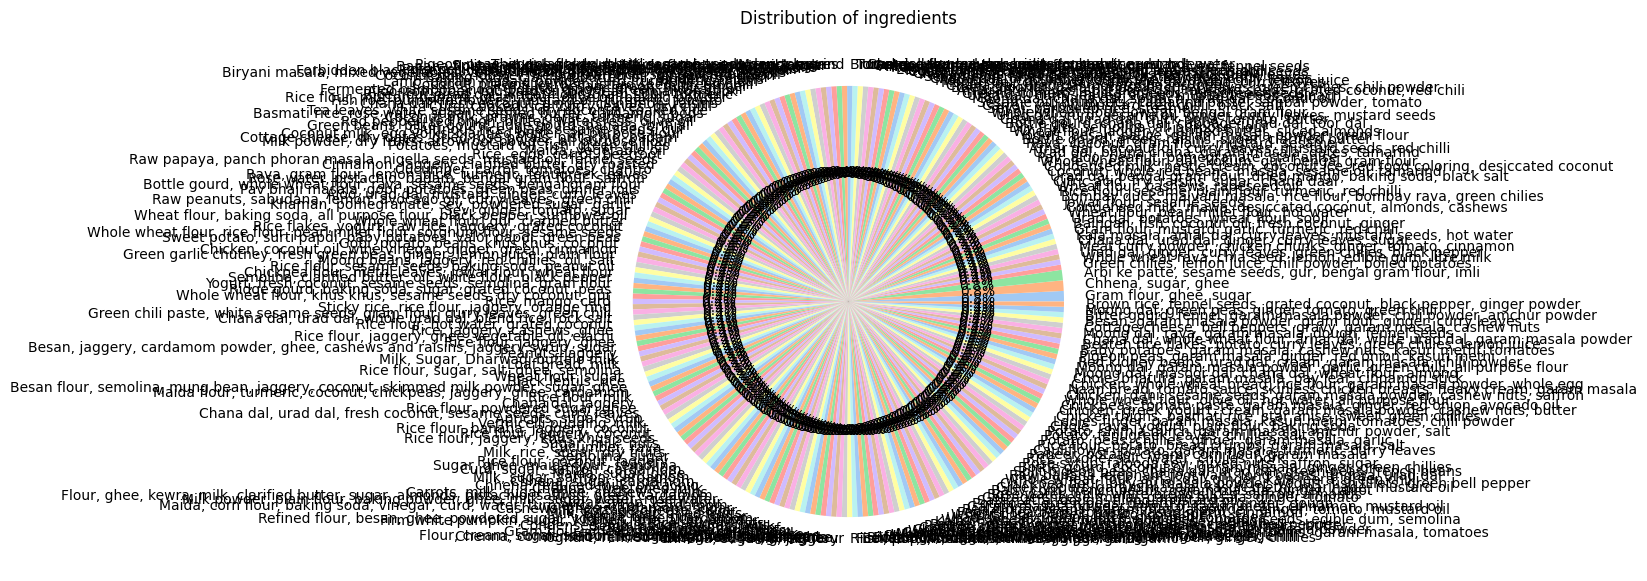

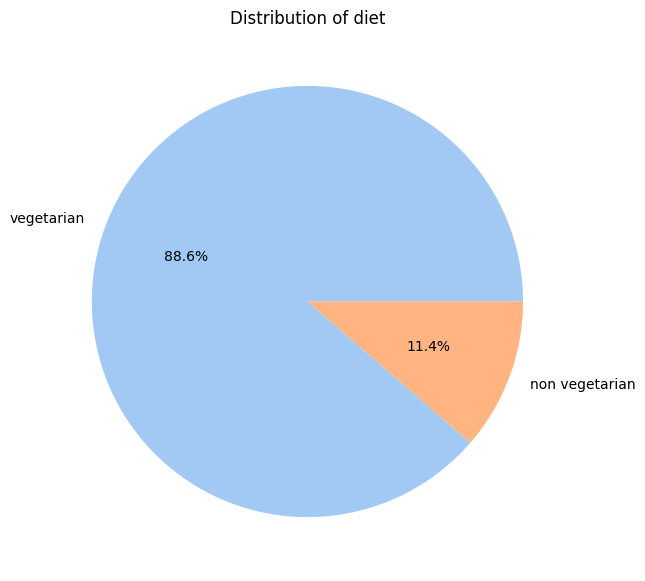

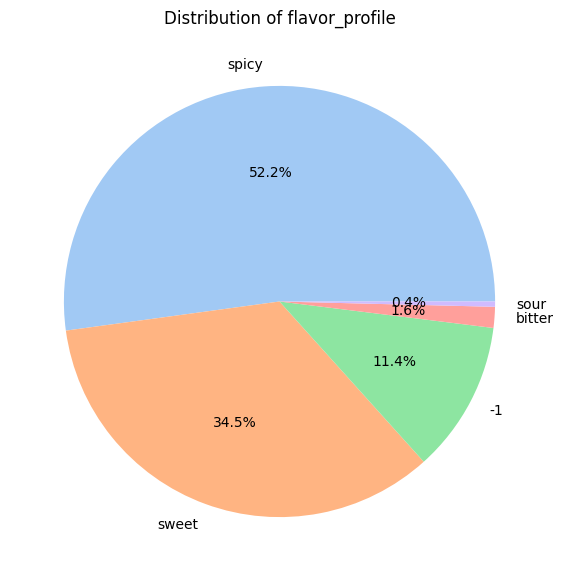

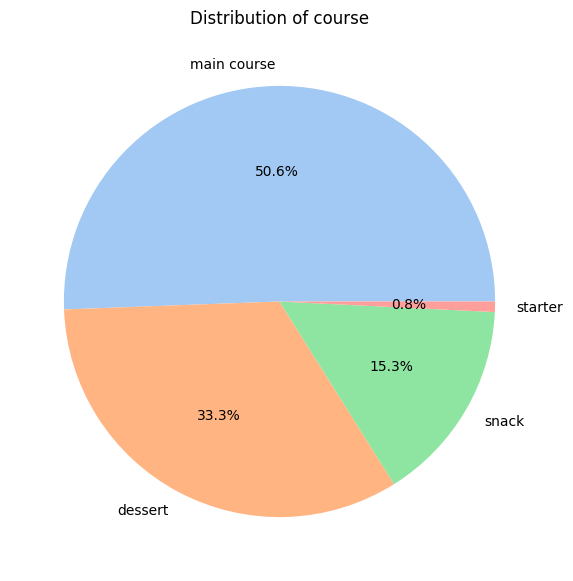

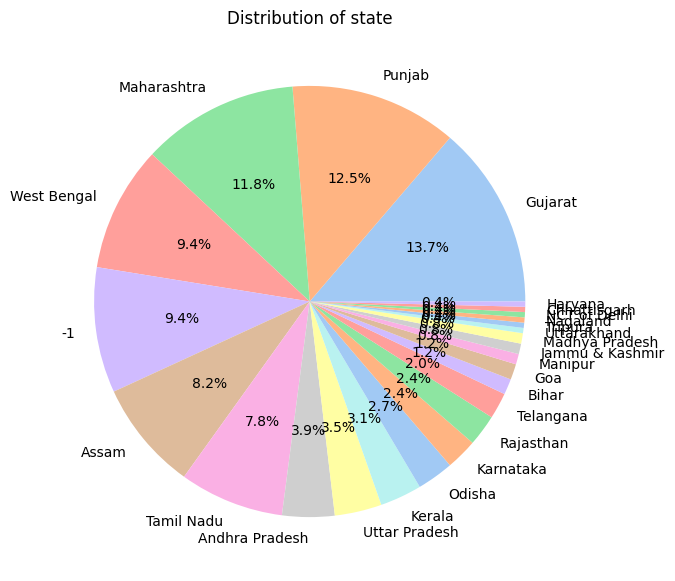

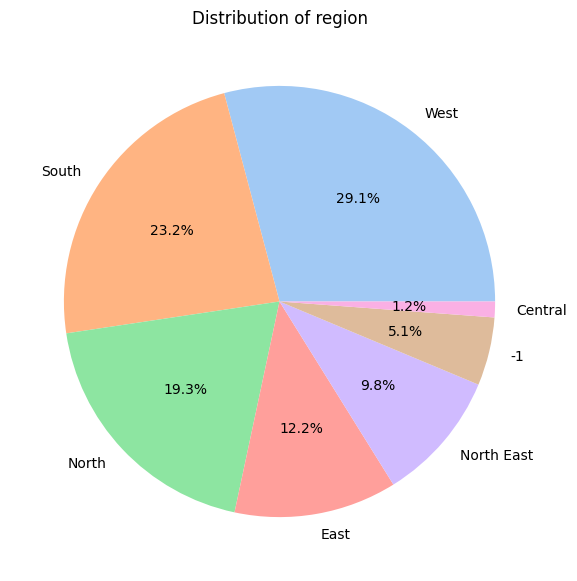

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/mnt/data/indian_food.csv'
df=pd.read_csv('indian_food.csv')

# 1. Shape of the dataset
print("Shape of the dataset (Rows, Columns):", df.shape)

# 2. Columns and data types
print("\nColumn Names and Data Types:")
print(df.dtypes)

# 3. Checking for missing values
print("\nMissing Values in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)

# 4. Statistical summary of numerical columns
print("\nStatistical Summary of Numerical Columns:")
print(df.describe())

# 5. Statistical summary of categorical columns
print("\nSummary of Categorical Columns:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

# 6. Percentage of missing values
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
print("\nPercentage of Missing Values in Each Column:")
print(missing_percentage)

# Visualizations

# Bar Graph for Missing Values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values in Each Column')
plt.ylabel('Count of Missing Values')
plt.xlabel('Columns')
plt.show()

# Pie Charts for Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(7, 7))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
    plt.title(f'Distribution of {col}')
    plt.ylabel('')
    plt.show()
